In [30]:
import pandas as pd
import numpy as np
import re
from statistics import mean,stdev

In [44]:
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [32]:
songs_df = pd.read_csv("./data/spotify_song_data_v1.csv")
# lyrics_df = pd.read_csv("./data/lyrics_df.csv")
# user_df = pd.read_csv("./data/user_playlist_data.csv")

print("Shape of songs data", songs_df.shape)
# print("Shape of user playlist data", user_df.shape)
# print("Shape of lyrics data", lyrics_df.shape)

Shape of songs data (137013, 19)


In [ ]:
# Data preprocessing
# songs_df['artists'] = [" ".join(re.findall("[a-zA-Z]+", i)) for i in songs_df['artists']]
# songs_df = songs_df.sort_values(by=['name'], ascending=[True]).groupby(['name']).head(1).sort_index().reset_index(drop=True)

In [33]:
songs_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
2,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.128,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
3,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.402,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
4,0.996000,Mamie Smith Her Jazz Hounds,0.424,198627,0.245,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.235,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920


In [34]:
songs_df = songs_df[['id', 'name' , 'year' , 'artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence']]
songs_df.head()

,id,name,year,artists,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence
0,0cS0A1fUEUd1EW3FcF8AEI,Keep A Song In Your Soul,1920,Mamie Smith,0.991000,0.598,168333,0.224,0,0.000522,5,0.379,-12.628,0,12,1920,0.0936,149.976,0.6340
1,11m7laMUgmOKqI3oYzuhne,Golfing Papa,1920,Mamie Smith,0.993000,0.647,163827,0.186,0,0.000018,0,0.519,-12.098,1,4,1920,0.1740,97.600,0.6890
2,19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920,Oscar Velazquez,0.000173,0.730,422087,0.798,0,0.801000,2,0.128,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422
3,2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920,Mixe,0.295000,0.704,165224,0.707,1,0.000246,10,0.402,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990
4,3HnrHGLE9u2MjHtdobfWl9,Crazy Blues - 78rpm Version,1920,Mamie Smith Her Jazz Hounds,0.996000,0.424,198627,0.245,0,0.799000,5,0.235,-11.470,1,9,1920,0.0397,103.870,0.4770


In [35]:
def z_transform(series):
    avg = mean(series)
    sd = stdev(series)
    transformed = [np.round((i-avg)/sd,2) for i in series]
    return transformed

In [36]:
cluster1_df = songs_df.copy()
cluster1_df['z_energy'] = z_transform(songs_df['energy'])
cluster1_df['z_valence'] = z_transform(songs_df['valence'])

In [37]:
kmeans = KMeans(9)
kmeans.fit(cluster1_df[['z_valence','z_energy']])

KMeans(n_clusters=9)

Text(0, 0.5, 'WCSS')

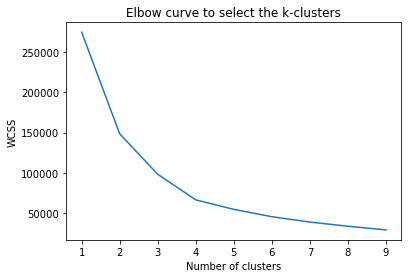

In [38]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster1_df[['z_valence','z_energy']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('Elbow curve to select the k-clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

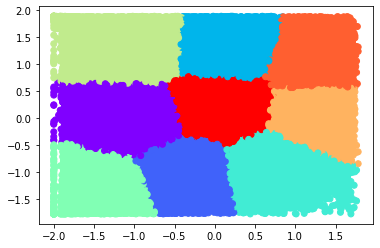

In [79]:
identified_clusters = kmeans.fit_predict(cluster1_df[['z_valence','z_energy']])

cluster_data = cluster1_df.copy()
cluster_data['Clusters'] = identified_clusters
plt.scatter(cluster_data['z_valence'], cluster_data['z_energy'], c=cluster_data['Clusters'], cmap='rainbow')

In [127]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def scaleClusterData(cluster_data):
    cluster_data_cpy = cluster_data.copy()
    cluster_data_cpy.fillna(0,inplace=True)
    # create data matrix
    data_matrix = np.matrix(cluster_data_cpy).astype(float)
    #scale using MinMaxScaler
    mms = MinMaxScaler()
    scaled_data = mms.fit_transform(data_matrix)
    return scaled_data

def getIdealKForEachIdentifiedClusterAndPerformKMeans(selected_features, identified_clusters, k_range):
    best_k_arr = []
    final_result_df = pd.DataFrame()
    for c in np.unique(identified_clusters):
        specific_cluster_data = cluster_data[cluster_data['Clusters']==c]
        specific_cluster_data_cpy = specific_cluster_data[selected_features].copy()
        scaled_data = scaleClusterData(specific_cluster_data_cpy)
        ans=[]
        for k in k_range:
            scaled_inertia = kMeansRes(scaled_data, k)
            ans.append((k, scaled_inertia))
            
        results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
        best_k = results.idxmin()[0]
        best_k_arr.append(best_k)
        
        # plot the results
        # plt.figure(figsize=(7,4))
        plt.plot(results,'o')
        plt.title('Adjusted Inertia For Selecting Ideal K')
        plt.xlabel('Number of Clusters, K')
        plt.ylabel('Adjusted Inertia')
        plt.xticks(range(2,15,1))
        plt.show()
        
        # after getting best k, perform k-means on that cluster to get sub clusters
        performKMeans(specific_cluster_data_cpy, c, best_k)
        final_result_df = final_result_df.append(specific_cluster_data_cpy) 
    return best_k_arr, final_result_df

def performKMeans(df, base_cluster_number, k):
    kMeansClustering = KMeans(k)
    identified_clusters = kMeansClustering.fit_predict(df)
    df['Clusters'] = [str(base_cluster_number)+'_'+str(i) for i in identified_clusters]
    

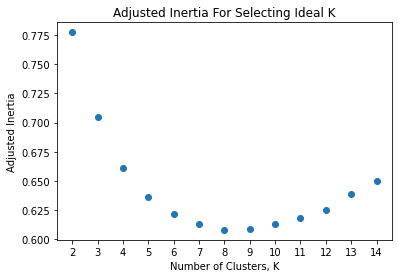

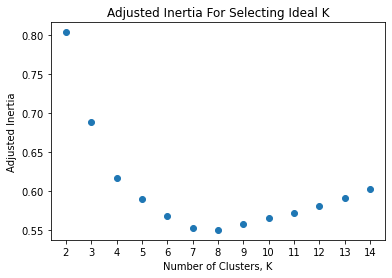

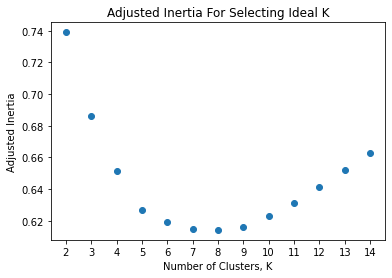

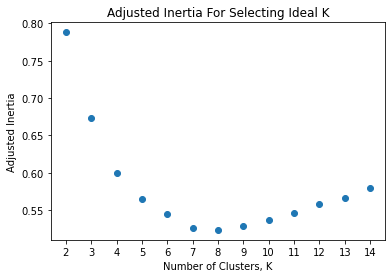

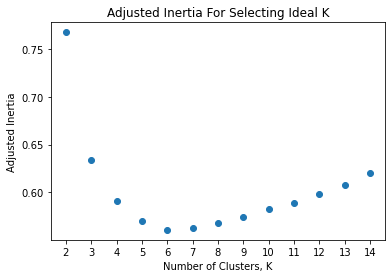

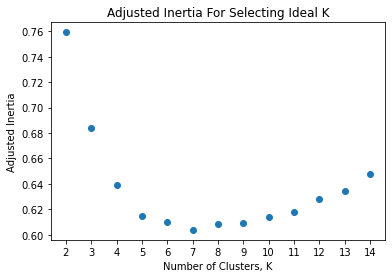

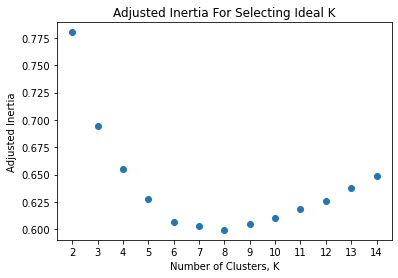

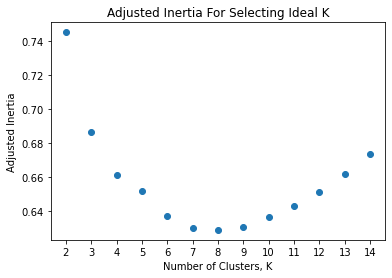

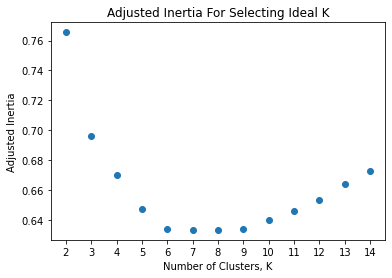

In [128]:
# choose k range
k_range=range(2,15)
features = ['z_valence','z_energy','acousticness','danceability','liveness','loudness','speechiness','tempo','mode','popularity','instrumentalness','key']
# compute adjusted inertia
n_clusters, new_clustered_data = getIdealKForEachIdentifiedClusterAndPerformKMeans(features, identified_clusters, k_range)

In [131]:
print(n_clusters)

[8, 8, 8, 8, 6, 7, 8, 8, 8]


In [185]:
import importlib
import getUserPlaylist
importlib.reload(getUserPlaylist)

<module 'getUserPlaylist' from 'C:\\Users\\ashish\\Desktop\\Development\\Moodify\\getUserPlaylist.py'>

In [219]:
def performKMeansForOneCluster(df, selected_features, k):
    kMeansClustering = KMeans(k)
    identified_clusters = kMeansClustering.fit_predict(df[selected_features])
    print(identified_clusters)
    df['Clusters'] = [str(i) for i in identified_clusters]
    
def getIdealKAndPerformKMeans(playlist_df, selected_features, k_range):
    # playlist_df_cpy = playlist_df[selected_features].copy()
    scaled_data = scaleClusterData(playlist_df[selected_features])
    ans=[]
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))

    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]

    # plot the results
    plt.plot(results,'o')
    plt.title('Adjusted Inertia For Selecting Ideal K')
    plt.xlabel('Number of Clusters, K')
    plt.ylabel('Adjusted Inertia')
    plt.xticks(range(2,15,1))
    plt.show()

    # after getting best k, perform k-means user's song clusters
    performKMeansForOneCluster(playlist_df, selected_features, best_k)
    return best_k

In [220]:
playlist_df = getUserPlaylist.analyze_playlist("0cennos3iua0u6lvhcle1x707", "5wrnNtjBQ3JawfRur0mvun?si=bd13ac2cd43644ed")
print(playlist_df.shape)

(55, 18)


In [221]:
playlist_df['z_energy'] = z_transform(playlist_df['energy'])
playlist_df['z_valence'] = z_transform(playlist_df['valence'])

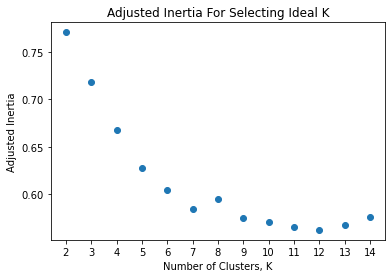

[10  5  2  9  2  3 10  6 10 10  8  0 11  6  9  4  4  5  1  5  9  8  0  0
  0  9  0  0  9 11  9  0  0  7  1  1  1  4  9  4  5  1  9 11  0 10  6 10
  5  1  1 11  5  1  5]
Number of Clusters:  12


,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,z_energy,z_valence,Clusters
0,Aura Da Prophet,Fly,Fly,1KtiWNj2Q70JC0NYQnh7i8,29,0.684,0.542,10,-10.147,0,...,0.1210,0,0.1190,0.290,115.011,274232,4,-0.40,-0.88,10
1,Aura Da Prophet,Metamorphosis,Metamorphosis,18Cv0XFfUPEVtDS9GBD65t,42,0.580,0.727,2,-12.499,1,...,0.5240,0,0.1010,0.807,135.816,213603,4,0.79,1.67,5
2,Aura Da Prophet,Smoke That Good,Smoke That Good,6HmtDr8q2kPiNZSYIG9epI,18,0.736,0.487,10,-12.554,0,...,0.0559,0,0.1220,0.213,118.966,145215,4,-0.75,-1.26,2
3,Aura Da Prophet,The Plot to Self Destruction,The Plot to Self Destruction,2lBLndanbhInzMtjeTexKB,43,0.783,0.558,6,-8.500,1,...,0.7610,0,0.1170,0.441,96.034,181211,4,-0.30,-0.13,9
4,Aura Da Prophet,Oneness,Oneness,6l1tOOMeoFPGYPJbIwkAGR,15,0.682,0.628,4,-9.430,0,...,0.4440,0.00126,0.0879,0.727,126.157,192026,4,0.15,1.28,2


In [223]:
n_clusters = getIdealKAndPerformKMeans(playlist_df, features, k_range)
print("Number of Clusters: ", n_clusters)
playlist_df.head(n=5)

In [355]:
setToAgg = ['z_valence','z_energy','acousticness','danceability','liveness','loudness','speechiness','tempo','mode','popularity','instrumentalness','key', 'Clusters']

temp_df = playlist_df.copy()

count_series = playlist_df.groupby(['Clusters']).size()
count_df = count_series.to_frame(name = 'size').reset_index()
print(count_df.head())
temp_df = temp_df[setToAgg].groupby(['Clusters']).agg(['sum']).reset_index().join(count_df)
temp_df.head(n=12)

  Clusters  size
0        0     9
1        1     8
2       10     6
3       11     4
4        2     2


C:\Users\ashish\miniconda3\lib\site-packages\pandas\core\frame.py:9138: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  sort=sort,


,"(Clusters, )","(z_valence, sum)","(z_energy, sum)","(acousticness, sum)","(danceability, sum)","(liveness, sum)","(loudness, sum)","(speechiness, sum)","(tempo, sum)","(mode, sum)","(popularity, sum)","(instrumentalness, sum)","(key, sum)",Clusters,size
0,0,-1.11,-4.07,4.0133,6.972,1.4363,-85.538,1.9465,1164.465,3,456,0.481041,44,0,9
1,1,1.80,4.64,2.3706,4.566,2.3909,-65.553,2.3670,701.879,5,272,0.766762,40,1,8
2,10,-4.71,-4.24,2.1040,3.604,1.5188,-72.633,1.7780,684.678,2,168,0.107491,30,10,6
3,11,1.50,3.63,1.5293,2.508,1.6410,-21.751,0.8385,573.467,2,178,0.041555,30,11,4
4,2,0.02,-0.60,0.4999,1.418,0.2099,-21.984,0.2893,245.123,0,33,0.00126,14,2,2
5,3,-0.89,0.50,0.3120,0.609,0.1560,-7.375,0.2990,187.885,1,31,0,2,3,1
6,4,4.19,1.69,2.1240,2.349,1.8630,-38.823,1.6510,340.798,1,48,0.022502,33,4,4
7,5,0.52,-1.85,3.3530,4.351,0.8670,-82.122,2.1399,933.986,4,255,0.251506,43,5,7
8,6,0.71,0.35,1.0014,1.910,0.6370,-25.701,0.9150,439.972,1,90,0.000011,9,6,3
9,7,0.59,2.17,0.1020,0.458,0.3280,-6.673,0.0509,158.161,0,8,0.000097,1,7,1


In [364]:
tot_size = temp_df['size'].sum()
temp_df.iloc[:, 1:13].mul(temp_df['size'],axis=0)
temp_df.head(n=12)
temp_df.iloc[:, 1:13].div(tot_size,axis=0)
df.loc['total'] = temp_df.sum(numeric_only=True, axis=0)

IndexingError: Too many indexers

In [ ]:
# import time
# t1= time.time()
# song_lyrics = []
# for i in artist_songs[:10]:
#     song_lyrics.append(extract_lyrics(i[0],i[1]))
# print(time.time()-t1)